# Dataset Link: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

TO CLASSIFY THE TRAFFIC SIGNS EFFICIENTLY USING CNN MODEL,AND GET THE BEST RESULTS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 
for i in range(classes): 
    path = os. path.join(cur_path,'Train', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        try: 
            image = Image.open(path +'\\'+a) 
            image = image.resize((30,30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except: 
            print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [2]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [3]:
#Splitting training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# CNN model building

In [5]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training and validation

In [6]:
eps = 15
anc = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_val, y_val))

Epoch 1/15
981/981 [==============================] - 49s 49ms/step - loss: 1.8843 - accuracy: 0.5178 - val_loss: 0.4336 - val_accuracy: 0.9024
Epoch 2/15
981/981 [==============================] - 52s 53ms/step - loss: 0.5986 - accuracy: 0.8265 - val_loss: 0.1417 - val_accuracy: 0.9651
Epoch 3/15
981/981 [==============================] - 62s 64ms/step - loss: 0.3771 - accuracy: 0.8886 - val_loss: 0.1014 - val_accuracy: 0.9751
Epoch 4/15
981/981 [==============================] - 74s 75ms/step - loss: 0.3036 - accuracy: 0.9144 - val_loss: 0.0960 - val_accuracy: 0.9748
Epoch 5/15
981/981 [==============================] - 64s 66ms/step - loss: 0.2667 - accuracy: 0.9256 - val_loss: 0.0686 - val_accuracy: 0.9820
Epoch 6/15
981/981 [==============================] - 65s 67ms/step - loss: 0.2660 - accuracy: 0.9275 - val_loss: 0.0742 - val_accuracy: 0.9791
Epoch 7/15
981/981 [==============================] - 82s 84ms/step - loss: 0.2353 - accuracy: 0.9360 - val_loss: 0.0560 - val_accuracy:

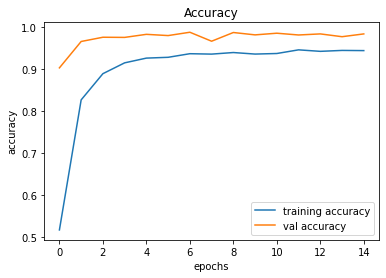

In [7]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

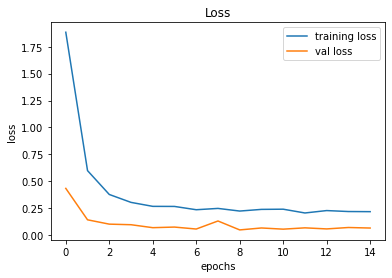

In [8]:
#plotting graphs for loss
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Model testing

In [12]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)
#pred = model.predict_classes(X_test)

395/395 [==============================] - 4s 9ms/step


In [13]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9470308788598575


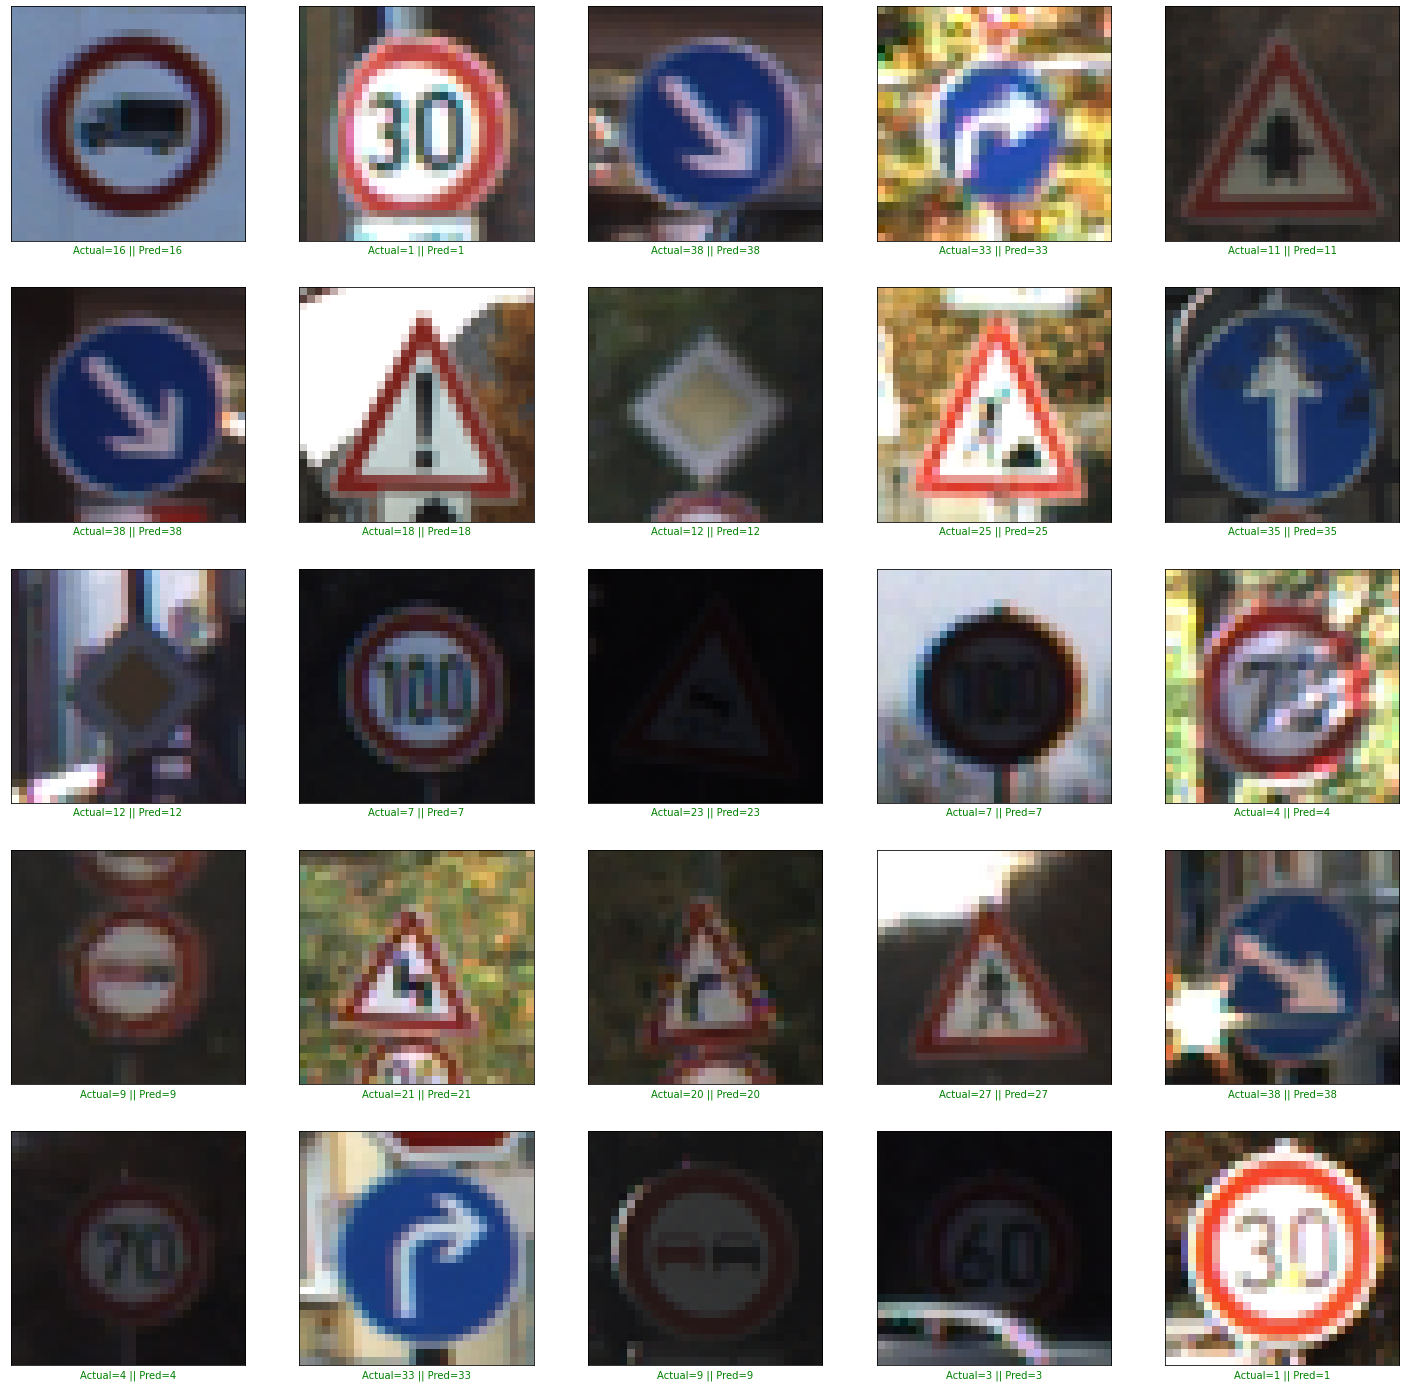

In [16]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

0:'Speed limit (20km/h)',
1:'Speed limit (30km/h)', 
2:'Speed limit (50km/h)', 
3:'Speed limit (60km/h)', 
4:'Speed limit (70km/h)', 
5:'Speed limit (80km/h)', 
6:'End of speed limit (80km/h)', 
7:'Speed limit (100km/h)', 
8:'Speed limit (120km/h)', 
9:'No passing', 
10:'No passing veh over 3.5 tons', 
11:'Right-of-way at intersection', 
12:'Priority road', 
13:'Yield', 
14:'Stop', 
15:'No vehicles', 
16:'Veh > 3.5 tons prohibited', 
17:'No entry', 
18:'General caution', 
19:'Dangerous curve left', 
20:'Dangerous curve right', 
21:'Double curve', 
22:'Bumpy road', 
23:'Slippery road', 
24:'Road narrows on the right', 
25:'Road work', 
26:'Traffic signals', 
27:'Pedestrians', 
28:'Children crossing', 
29:'Bicycles crossing', 
30:'Beware of ice/snow',
31:'Wild animals crossing', 
32:'End speed + passing limits', 
33:'Turn right ahead', 
34:'Turn left ahead', 
35:'Ahead only', 
36:'Go straight or right', 
37:'Go straight or left', 
38:'Keep right', 
39:'Keep left', 
40:'Roundabout mandatory', 
41:'End of no passing', 
42:'End no passing veh > 3.5 tons'